## Homework Week 7

#### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Chess Game Dataset 

In [2]:
df = pd.read_csv('C:/Users/Taguhi/Desktop/W7 homework/games.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


#### General information about dataset

In [4]:
df.shape

(20058, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


We have no missing values, but the start and end times are in milliseconds and therefore are of a float data type.

#### Converting start time and end time from milliseconds to datetime

In [6]:
df.created_at = pd.to_datetime(df.created_at, unit="ms")
df.last_move_at = pd.to_datetime(df.last_move_at, unit="ms")

#### Adding a new column showing the duration of the game in minutes

In [7]:
df["game_duration"] = (df.last_move_at - df.created_at).dt.total_seconds()/60

In [8]:
df.tail()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration
20053,EfqH7VVH,True,2017-07-11 16:35:14.342,2017-07-11 16:40:36.076,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,5.362233
20054,WSJDhbPl,True,2017-07-10 14:48:09.760,2017-07-10 15:00:33.979,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,12.403650
20055,yrAas0Kj,True,2017-07-10 14:44:37.493,2017-07-10 14:47:30.327,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,2.880567
20056,b0v4tRyF,True,2017-07-10 14:15:27.019,2017-07-10 14:31:13.718,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,15.778317
20057,N8G2JHGG,True,2017-07-09 23:32:32.649,2017-07-09 23:44:49.348,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3,12.278317


#### Describe numerical variables

In [9]:
df.describe()

,turns,white_rating,black_rating,opening_ply,game_duration
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981,14.495117
std,33.570585,291.253376,291.036126,2.797152,80.237035
min,1.000000,784.000000,789.000000,1.000000,0.000000
25%,37.000000,1398.000000,1391.000000,3.000000,0.000000
50%,55.000000,1567.000000,1562.000000,4.000000,4.010200
75%,79.000000,1793.000000,1784.000000,6.000000,13.219521
max,349.000000,2700.000000,2723.000000,28.000000,10097.411683


In [10]:
df[df.game_duration == max(df.game_duration)]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,game_duration
10754,eyhzu8aj,False,2014-01-16 14:32:13.749,2014-01-23 14:49:38.450,35,resign,white,180+180,towhen,1245,miladghasemi,1011,d4 f6 Nf3 e5 e3 Nc6 Nc3 d5 Nb5 Qd7 Bd2 a6 Na3 ...,A40,Queen's Pawn,1,10097.411683


It seems that we have outliers as well as strange values for the duration of the game, but I think they are possible for a chess game

#### Describe categorical variables

In [11]:
df.describe(include = 'object')

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
count,20058,20058,20058,20058,20058,20058,20058,20058,20058
unique,19113,4,3,400,9438,9331,18920,365,1477
top,XRuQPSzH,resign,white,10+0,taranga,taranga,e4 e5,A00,Van't Kruijs Opening
freq,5,11147,10001,7721,72,82,27,1007,368


### The main hypothesis to check by visualizations are
- Do players with white pieces win more? To check this hypothesis, we need to plot a barplot of total counts, and we also can plot  a stacked bar plot to see differences by victory status
- Does the length of game affect the result? To check this hypothesis, we need to plot a boxplot to compare mean turns and mean game' duration by winner
- Which openings are the best? To check, this I decided to compare openings by average game ratings
- Is there any relationship between the duration of the game (duration and number of moves) and the rating of the players? To find patterns we need pairplot and heatmap.

### Do players with white pieces win more?

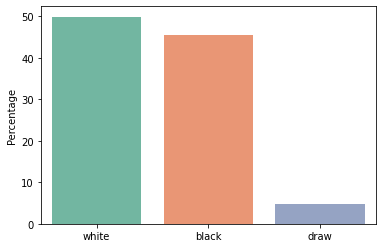

In [12]:
ax = sns.barplot(x = df.winner.unique(), y = df.winner.value_counts(normalize = True)*100, palette= 'Set2')
ax.set_ylabel('Percentage');

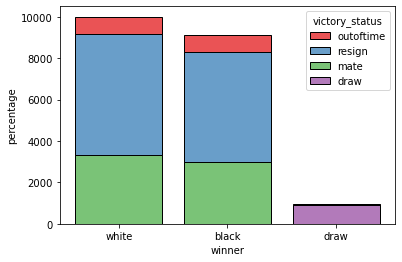

In [13]:

ax = sns.histplot(data =df,x = 'winner', hue = 'victory_status', palette= 'Set1',multiple='stack', shrink=0.8)
ax.set_ylabel('percentage')
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

White players win more(in total and by mate, by resign), according to these data, but the difference is small and can be non-significant.

### Does the length of game affect the result?

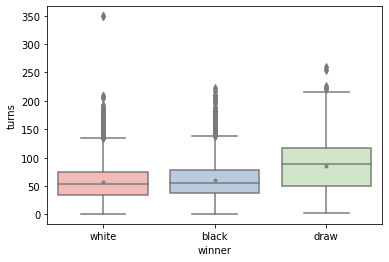

In [14]:
sns.boxplot(data =df,x ='winner', y = 'turns', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"grey", 
                       "markeredgecolor":"grey",
                      "markersize":"3"}, palette = "Pastel1" );

- The average number of moves is almost the same in games where White or Black wins, but in games with a draw ends, the number of moves is higher.

- As we noticed earlier, there are also outliers which affect the mean, and to see the difference better, we can get rid of outliers

In [15]:
columns = ['turns','game_duration']
for name in columns:
    Q1=df[name].quantile(0.25)
    Q3=df[name].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df = df[df[name]< Upper_Whisker]
    df = df[df[name]> Lower_Whisker]

In [16]:
df.shape

(18239, 17)

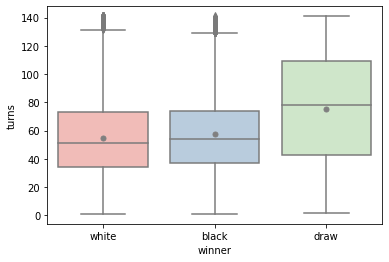

In [17]:
sns.boxplot(data =df,x ='winner', y = 'turns', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"grey", 
                       "markeredgecolor":"grey",
                      "markersize":"5"}, palette = "Pastel1" );

- The results are almost the same

#### As we have another variable for length of the game(game duration) we can also check hypothesis using that column

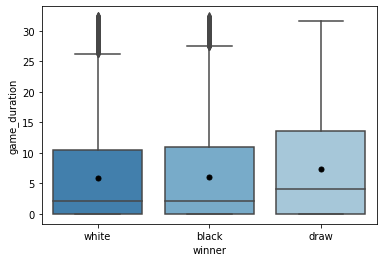

In [18]:
sns.boxplot(data =df,x ='winner', y = 'game_duration', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"}, palette = 'tab20c');

And here we see the same pattern, so the time of the game does not affect the result of the game

### Which openings are the best?

In [19]:
df['game_rating']=(df.black_rating+df.white_rating)/2

Since we have openings for games (not for players), to understand which openings are used according to rating, we need ratings for games. I calculated this as the average rating of both players.

In [20]:
len(df.opening_name.unique())

1413

There are too many opening names, so I decided to use only the most and the least commonly used names.

In [27]:
opening = df.opening_name.value_counts().sort_values(ascending = False)
most_used = opening[:5].index.tolist()
least_used = opening.tail(5).index.tolist()


Van't Kruijs Opening                                         345
Sicilian Defense                                             323
Sicilian Defense: Bowdler Attack                             263
French Defense: Knight Variation                             253
Scotch Game                                                  248
                                                            ... 
Ruy Lopez: Closed |  8.c3                                      1
Sicilian Defense: Dragon Variation |  Classical Variation      1
Neo-Gruenfeld Defense: Classical Variation                     1
Modern Defense: Beefeater Variation                            1
Scandinavian Defense: Zilbermints Gambit                       1
Name: opening_name, Length: 1413, dtype: int64

In [28]:
h = df.groupby('opening_name')['game_rating'].mean().reset_index()
data = h[h.opening_name.isin(most_used)].append(h[h.opening_name.isin(least_used)])

In [34]:
g = data[(data.game_rating<max(data.game_rating)) & (data.game_rating>min(data.game_rating))]
pal = ['g']
for name in g.opening_name:
    pal.append('grey')
pal.append('r')
g

,opening_name,game_rating
340,French Defense: Knight Variation,1571.547431
1099,Scotch Game,1513.393145
1141,Sicilian Defense,1562.456656
1155,Sicilian Defense: Bowdler Attack,1565.754753
677,Neo-Gruenfeld Defense: Classical Variation,1840.000000
1021,Ruy Lopez: Closed | 8.c3,1629.000000
1097,Scandinavian Defense: Zilbermints Gambit,1500.000000
1174,Sicilian Defense: Dragon Variation | Classica...,1969.000000


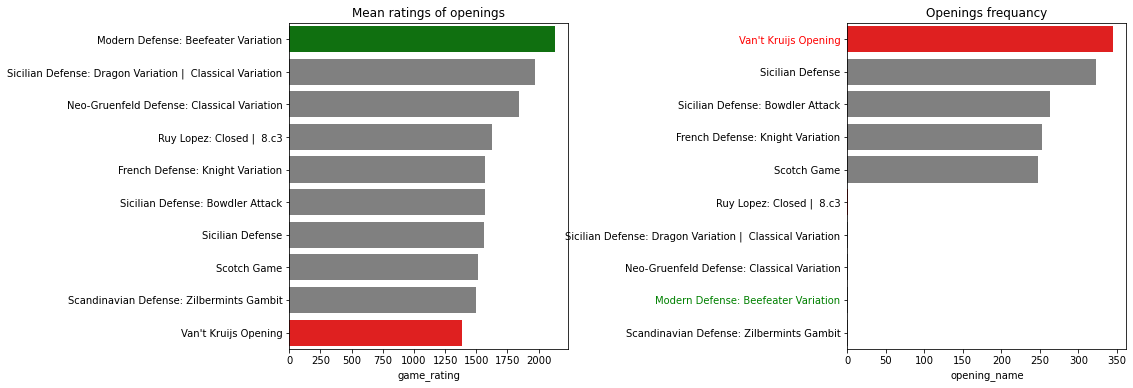

In [42]:
fig, axes = plt.subplots(1, 2)
sns.barplot(ax = axes[0],data = data, x = 'game_rating', y= 'opening_name',
            order= data.sort_values('game_rating',ascending = False).opening_name,
           palette = pal)
opening_counts =  opening[:5].append(opening.tail(5))
sns.barplot(ax = axes[1],y = opening_counts.index.tolist(), x = opening_counts, palette = ['red', 'grey','grey','grey','grey'])
axes[0].set_ylabel('')
axes[1].get_yticklabels()[0].set_color("red")
axes[1].get_yticklabels()[8].set_color("green")
axes[0].set_title('Mean ratings of openings')
axes[1].set_title('Openings frequancy')
fig.subplots_adjust(wspace=1)
fig.set_figheight(6)
fig.set_figwidth(15)


As we see, Modern defense was used only once, but it was used in the game with a high rating, and on average, it was used in the highest rating games. Opposite is for Van't Krujis Opening, it is most used opening, but on average it is used in lower rating games.

In [25]:
df.describe()

,turns,white_rating,black_rating,opening_ply,game_duration,game_rating
count,18239.000000,18239.000000,18239.000000,18239.000000,18239.000000,18239.000000
mean,56.971216,1588.467241,1580.551346,4.761665,6.019005,1584.509293
std,29.794359,287.191140,288.221555,2.734705,7.516260,259.461243
min,1.000000,784.000000,789.000000,1.000000,0.000000,816.500000
25%,36.000000,1391.000000,1385.000000,3.000000,0.000000,1400.500000
50%,53.000000,1560.000000,1554.000000,4.000000,2.161283,1560.500000
75%,75.000000,1783.000000,1772.000000,6.000000,10.882692,1761.500000
max,141.000000,2621.000000,2723.000000,28.000000,32.415100,2475.500000


### Is there any relationship between the duration of the game (duration and number of moves) and the rating of the players?

In [53]:
filtered = df[['turns','white_rating','black_rating','game_duration', 'rated']]
filtered

,turns,white_rating,black_rating,game_duration,rated
0,13,1500,1191,0.000000,False
1,16,1322,1261,0.000000,True
2,61,1496,1500,0.000000,True
3,61,1439,1454,0.000000,True
4,95,1523,1469,0.000000,True
...,...,...,...,...,...
20053,24,1691,1220,5.362233,True
20054,82,1233,1196,12.403650,True
20055,35,1219,1286,2.880567,True
20056,109,1360,1227,15.778317,True


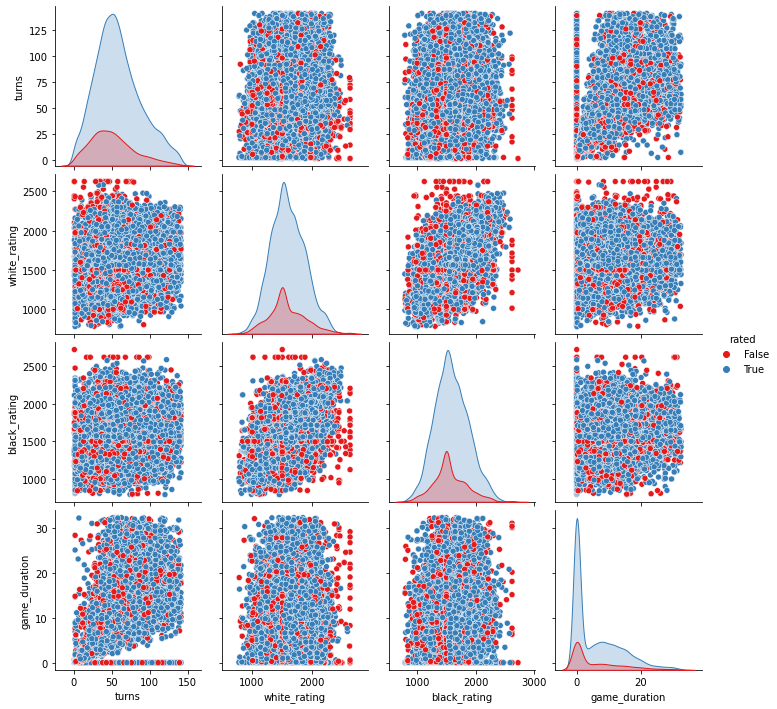

In [55]:
sns.pairplot(filtered, hue = 'rated', palette = 'Set1')

There seems to be a relationship between the players' ratings, which makes sense that higher rated players play with each other. By this plot we don't see other patterns.

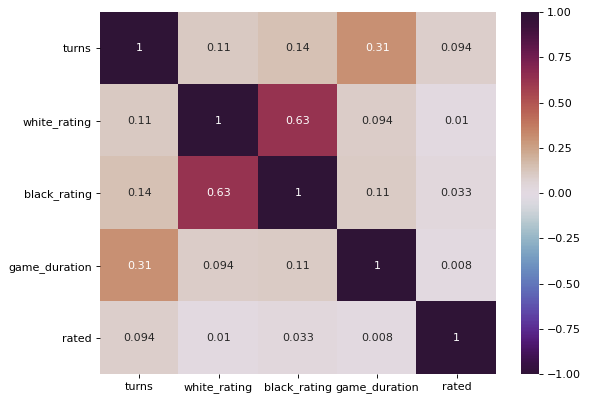

In [63]:
corr = filtered.corr()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=corr, cmap = 'twilight_shifted')

Here we see that there is a correlation only  between mentioned  columns.

### Here is also one interesting  animation of a game which had maximum turns count(141 moves, id-41T8PqHr)

<img src="chess.gif" width="750" align="center">